<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Using Jupyter (Good), Exercises</span></div>

## 1 Learning to interrupt

In [10]:
# while True:
#     print('*',end='')

"""We interrupt the Kernal by pressing the square stop button at the menu options."""

'We interrupt the Kernal by pressing the square stop button at the menu options.'

## 2 Resetting and Restarting the Kernal

In [11]:
print = 'PRINT'
print('Hello World')

TypeError: 'str' object is not callable

In [1]:
""""Restarted Kernal"""

print('Hello World')

Hello World


## 3 Timing Stuff

In [2]:
%%timeit
squares = [i**2 for i in range(10)]
# print(squares)

975 ns ± 33.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [3]:
%%timeit
squares = list()
for i in range(10):
    squares.append(i**2)
# print(squares)

1.09 μs ± 22.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Verdict
We see that the output of timeit is \[mean runtime\] $\pm$ \[standard deviation of runtime\] across the 7 runs done, with each run running the code snippet 1000000 times.

## Footnotes

In the following, we will see
1. how average runtime changes with number of squares produced.
2. how average runtime changes with number of loops.

In [27]:
'''
In the following, we will see how runtime increases with range of for loop for each type of loop.
'''

import time
import numpy as np

def loop_one(n):
    squares = [i**2 for i in range(n)]
    
def loop_two(n):
    squares = list()
    for i in range(n):
        squares.append(i**2)

In [30]:
time_arr_one = []
time_arr_two = []

range_arr = np.arange(10,501,10)

n_loops = 100000

for n in range_arr:

    start_one = time.time()
    
    for i in range(n_loops):
        loop_one(n)

    avg_duration = (time.time()-start_one)/n_loops

    time_arr_one.append(avg_duration)


for n in range_arr:

    start_two = time.time()
    
    for i in range(n_loops):
        loop_one(n)

    avg_duration = (time.time()-start_two)/n_loops

    time_arr_two.append(avg_duration)


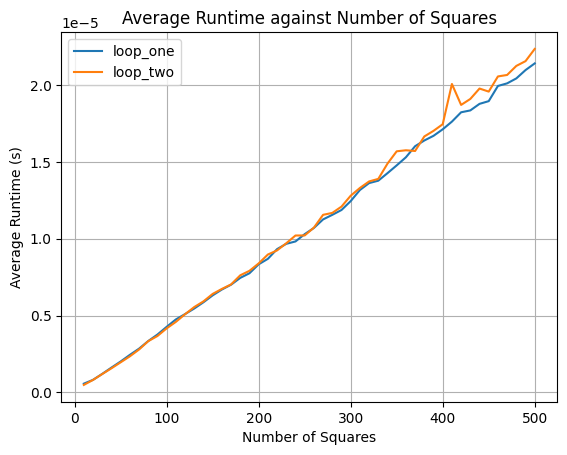

In [31]:
import matplotlib.pyplot as plt

plt.plot(range_arr,time_arr_one,label="loop_one")
plt.plot(range_arr,time_arr_two,label="loop_two")
plt.legend()
plt.title("Average Runtime against Number of Squares")
plt.grid(True)
plt.ylabel("Average Runtime (s)")
plt.xlabel("Number of Squares")
plt.show()

In [38]:
'''
Now we see how runtime increases with increasing number of loops.
'''
time_arr_one = []
time_arr_two = []

n_squares = 10

n_loops = np.logspace(3,8,num=8-3+1,base=10)

for n in n_loops:

    start_one = time.time()
    
    for i in range(int(n)):
        loop_one(n_squares)

    avg_duration = (time.time()-start_one)/n

    time_arr_one.append(avg_duration)


for n in n_loops:

    start_two = time.time()
    
    for i in range(int(n)):
        loop_one(n_squares)

    avg_duration = (time.time()-start_two)/n

    time_arr_two.append(avg_duration)


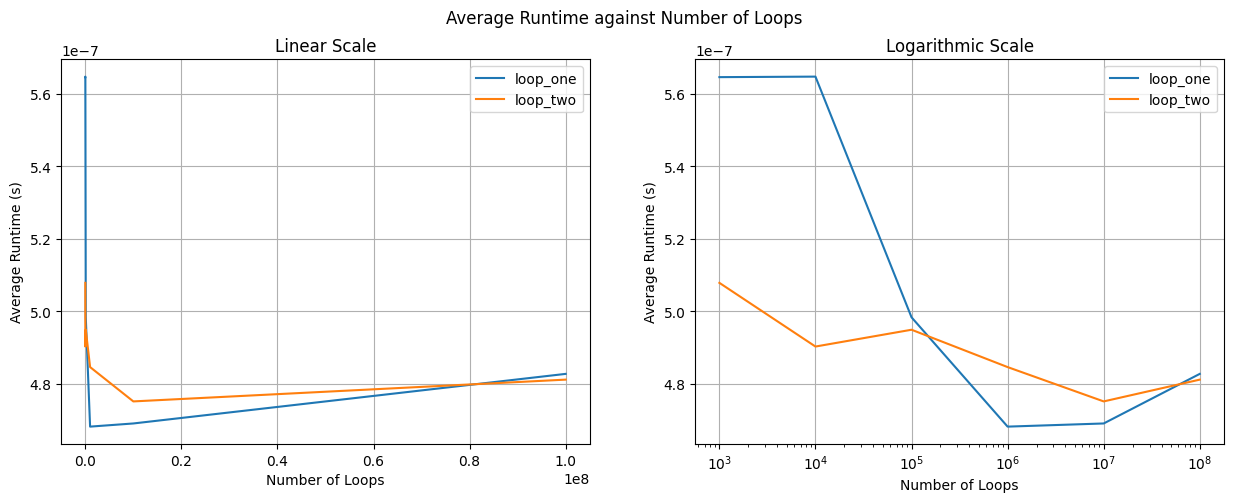

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].plot(n_loops,time_arr_one,label="loop_one")
ax[0].plot(n_loops,time_arr_two,label="loop_two")
ax[0].legend()
ax[0].set_title("Linear Scale")
ax[0].grid(True)
ax[0].set_ylabel("Average Runtime (s)")
ax[0].set_xlabel("Number of Loops")


ax[1].plot(n_loops,time_arr_one,label="loop_one")
ax[1].plot(n_loops,time_arr_two,label="loop_two")
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title("Logarithmic Scale")
ax[1].grid(True)
ax[1].set_ylabel("Average Runtime (s)")
ax[1].set_xlabel("Number of Loops")

plt.suptitle("Average Runtime against Number of Loops")
# plt.tight_layout()
plt.show()

### Conclusion
From the graphs, we notice that
1. Average runtime **increases linearly** with the number of squares.
2. Average runtime **decreases**, even on an exponential scale, with increasing number of loops.
3. The only noticeable difference between the two types of loops is that with loop one (list comprehension) has a **noticeably higher** runtime at the lower end of the number of loops.